Employee Turnover or Employee Turnover ratio is the measurement of the total number of employees who leave an organization in a particular year. Employee Turnover Prediction means to predict whether an employee is going to leave the organization in the coming period.

#  ----------------------------------Machine learning model Pipeline

# A.IMPORTING LIABRARIES

# B.EXPLORATORY DATA ANALYSIS
## Steps:
#### 1.Analysing the data
#### 2.See the outliers and check distribution of the data
#### 3.Analyse categorical data

# C.FEATURE ENGINEERING
## Steps:
#### 1.Missing values treatment
#### 2.Outlier treatment
#### 3.Handling categorical and continuously values
#### 4.Scale down continous values
#### 5.Dimension Reduction(Feature selection or Feature extraction)
#### 6.Splitting the dataset

# D.BUILD MODEL AND TRAIN WITH VARIOUS MODEL

# E. HYPERPARAMETER TUNING AND ALGORITHM SELECTION

# Import liabraries

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
d=pd.read_csv("C:/Users/sahoo/Downloads/datasets_9768_13874_HR_comma_sep.csv")
d

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


# EDA

In [3]:
d['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

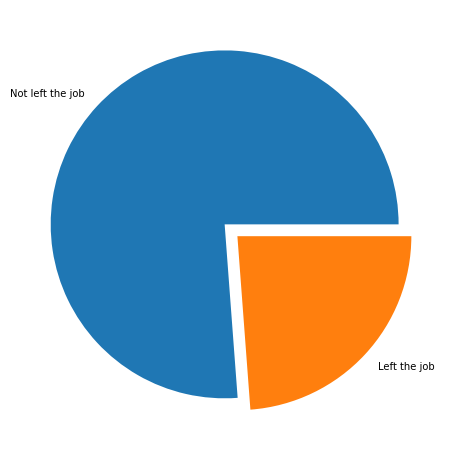

In [4]:
labels=['Not left the job','Left the job']
values=list(d['left'].value_counts())
explode = (0, 0.1)
plt.figure(figsize=(8,8))
plt.pie(values,labels=labels,explode=explode)
plt.show()

<Figure size 720x720 with 0 Axes>

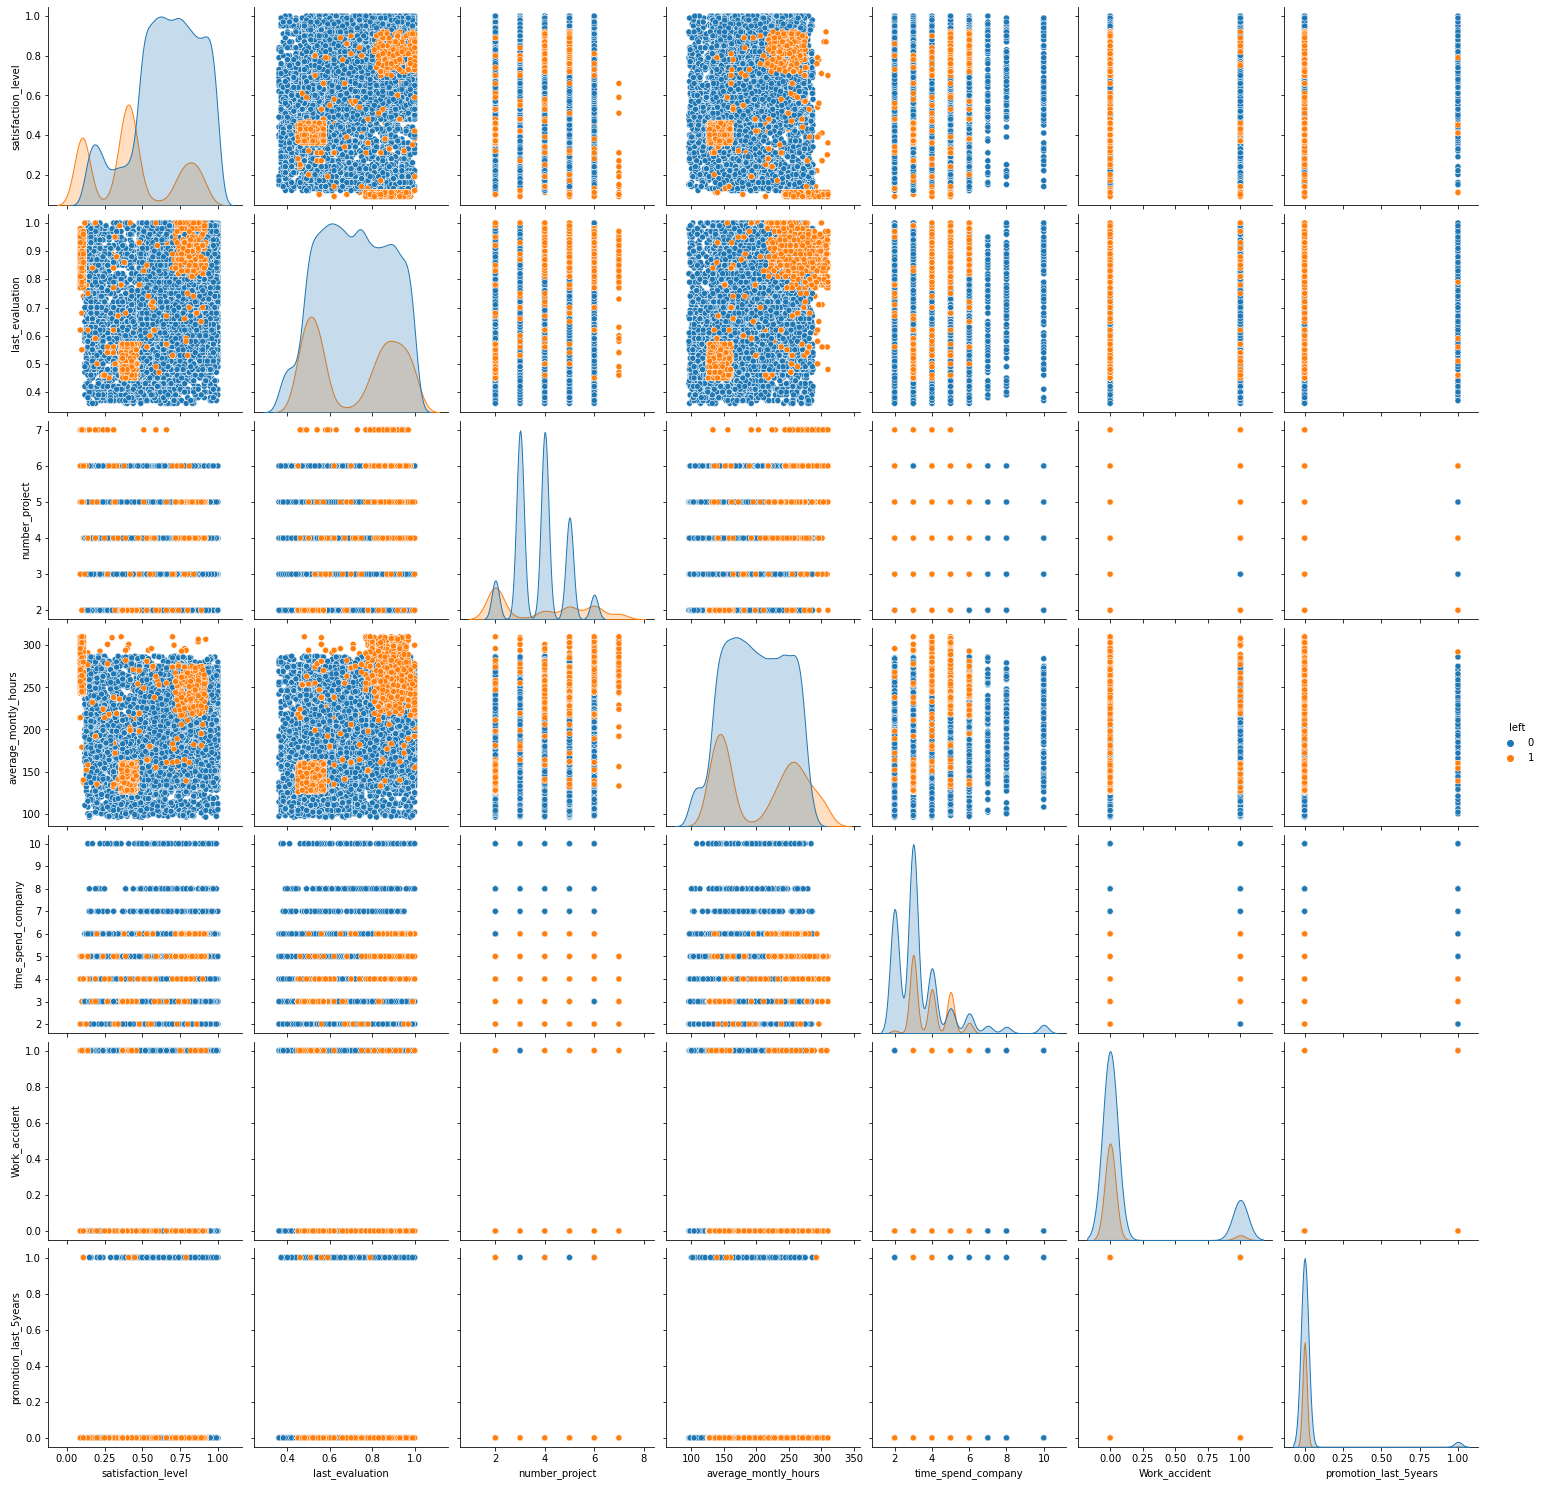

In [5]:
plt.figure(figsize=(10,10))
sns.pairplot(d,hue='left',height=3)
plt.show()

In [7]:
d.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

In [8]:
d['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [9]:
#num_col=[i for i in d.columns if d[i].dtypes!='O'] #contains all the numeric cols which has datatype not equal to object

num_col=['satisfaction_level','last_evaluation','average_montly_hours']

cat_col=list(set(d.columns)-set(num_col)) #set operation

num_col,cat_col

(['satisfaction_level', 'last_evaluation', 'average_montly_hours'],
 ['salary',
  'Work_accident',
  'number_project',
  'promotion_last_5years',
  'left',
  'sales',
  'time_spend_company'])

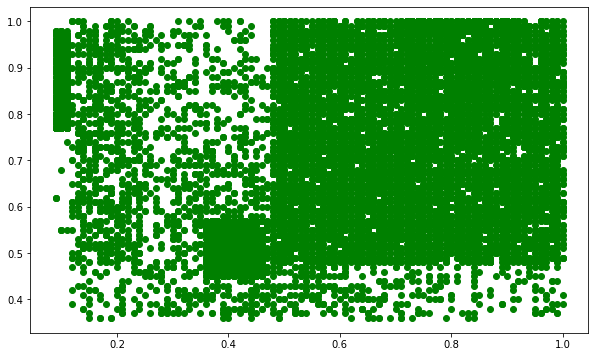

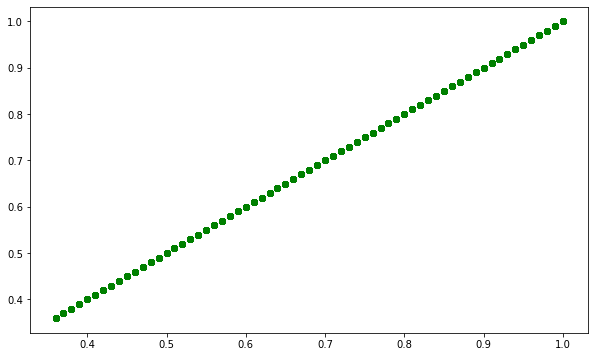

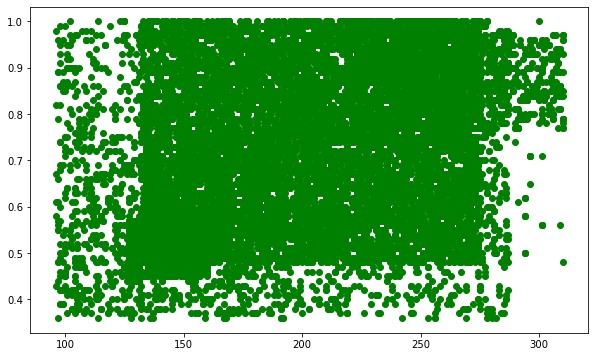

In [10]:
for i in num_col:
    plt.figure(figsize=(10,6))
    plt.scatter(d[i],d['last_evaluation'],c=['green'])
    plt.show()

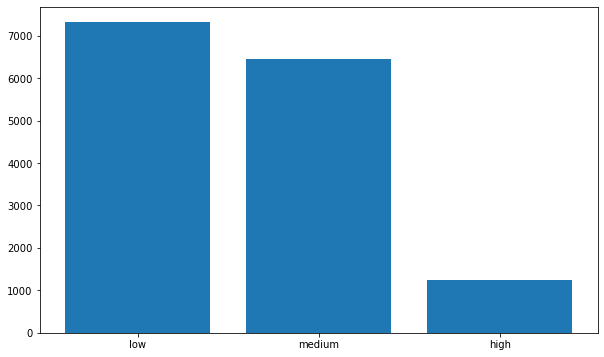

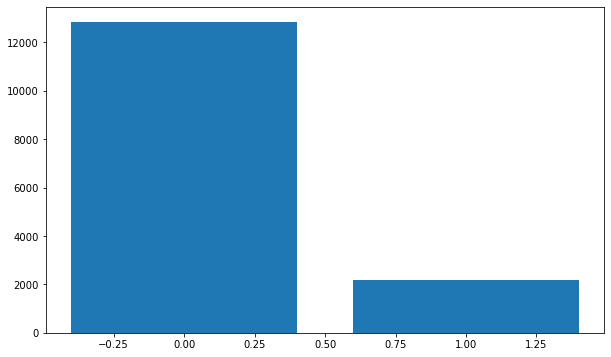

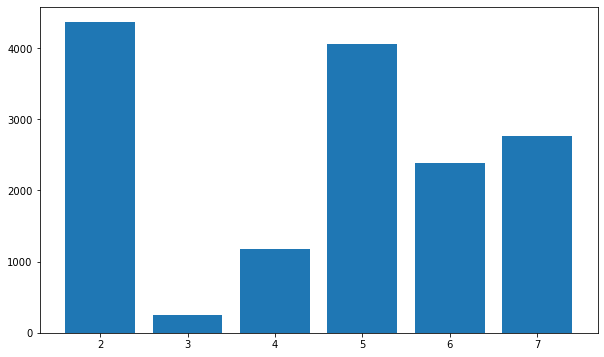

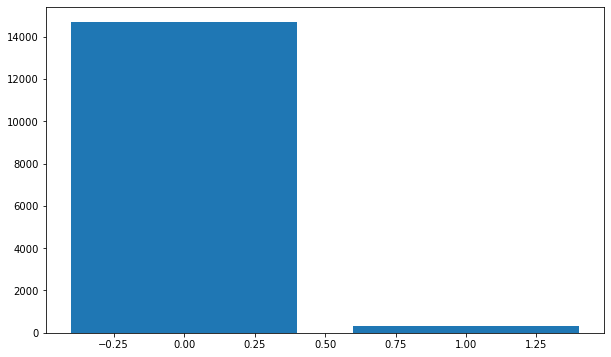

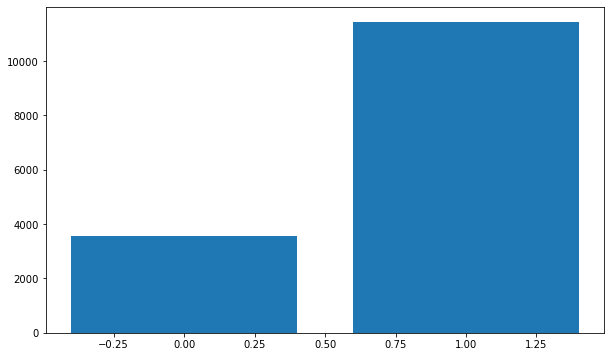

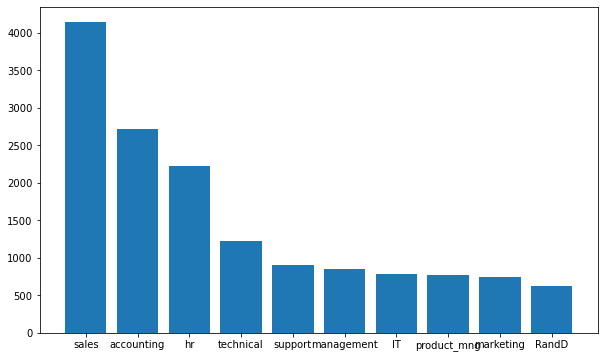

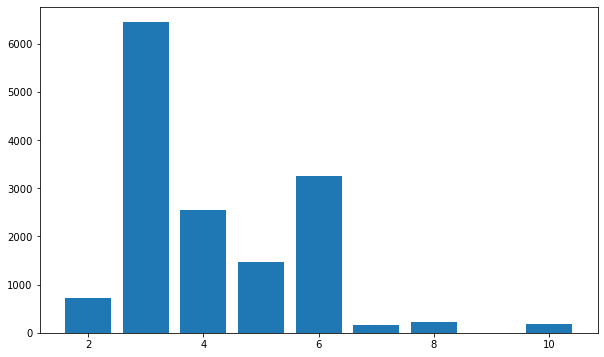

In [11]:
for i in cat_col:
    plt.figure(figsize=(10,6))
    plt.bar(list(d[i].unique()),list(d[i].value_counts()))
    plt.show()

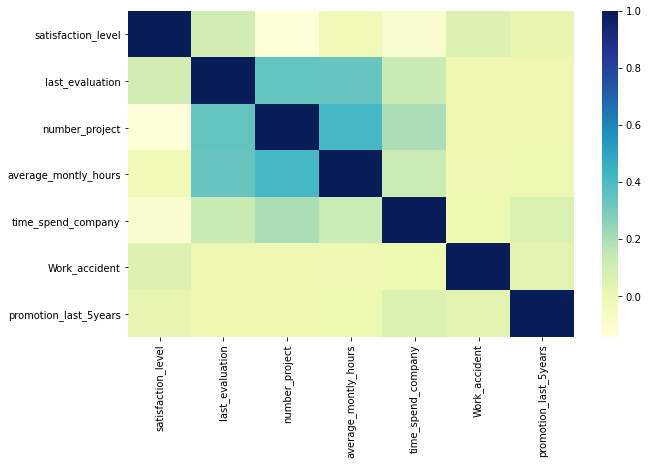

In [12]:
plt.figure(figsize=(10,6))
features=d.drop('left',axis=1).corr()
sns.heatmap(features
           ,cmap='YlGnBu')
plt.show()

# Observation


> There are less no. of employee who don't left that particular company.

> There are more no of employees who are under sales dept. followed by accounting and hr.

> And usually the person who have high satisfaction level then don't leave the job (we all know that if a peroson happy with his work who do he left the company).

>The people who have more avg monthly hour and got promotion in last 5 years they are most likely to not left the company.



# Feature engineering


In [13]:
d.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [14]:
d.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


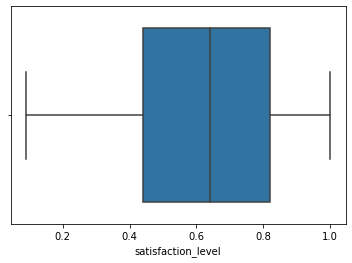

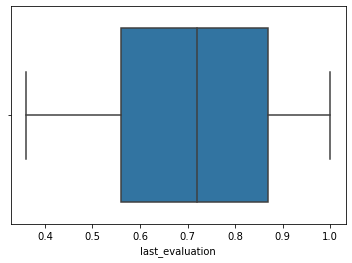

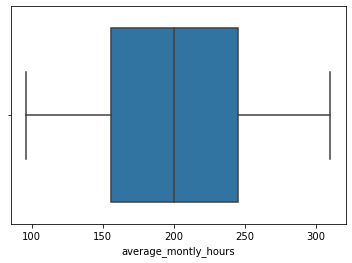

In [15]:
for i in num_col:
    sns.boxplot(x=d[i])
    plt.show()

In [23]:
enc=LabelEncoder()
#as machine learning algorithms can't handle categorical data if they are in string format so we have to convert into numeric format
d['sales']=enc.fit_transform(d['sales']) 
d['salary']=enc.fit_transform(d['salary'])

In [24]:
d

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,8,1
14995,0.37,0.48,2,160,3,0,1,0,8,1
14996,0.37,0.53,2,143,3,0,1,0,8,1
14997,0.11,0.96,6,280,4,0,1,0,8,1


In [33]:
scl=MinMaxScaler()

d_features=scl.fit_transform(d.drop('left',axis=1)) #we don't need to scale the target column

d_target=d['left']

In [41]:
d['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [46]:
x_train,x_test,y_train,y_test=train_test_split(d_features,d_target,random_state=42,test_size=0.25)

# D.Model Training

In [112]:
models=[]
models.append(('LR',LogisticRegression()))
models.append(('SVC',SVC()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('DT',DecisionTreeClassifier()))
models.append(('RF',RandomForestClassifier()))
models.append(('ET',ExtraTreesClassifier()))
models.append(('AdaB',AdaBoostClassifier()))
models.append(('GB',GradientBoostingClassifier()))

pred=[]
print("Start Training..\n")
for i,j in models:
    clf=j.fit(x_train,y_train)
    print("Model performance using {0}\n".format(i))
    pred_1=accuracy_score(y_test,clf.predict(x_test))
    print("_____Accuracy: ",pred_1)
    pred.append(pred_1)
    print("_____Confusion Matrix:\n ",confusion_matrix(y_test,clf.predict(x_test)))
    print("...")
    print("\n\n\n")
print("Done")

Start Training..

Model performance using LR

_____Accuracy:  0.7589333333333333
_____Confusion Matrix:
  [[2631  222]
 [ 682  215]]
...




Model performance using SVC

_____Accuracy:  0.9506666666666667
_____Confusion Matrix:
  [[2765   88]
 [  97  800]]
...




Model performance using KNN

_____Accuracy:  0.9496
_____Confusion Matrix:
  [[2745  108]
 [  81  816]]
...




Model performance using DT

_____Accuracy:  0.9736
_____Confusion Matrix:
  [[2785   68]
 [  31  866]]
...




Model performance using RF

_____Accuracy:  0.9896
_____Confusion Matrix:
  [[2846    7]
 [  32  865]]
...




Model performance using ET

_____Accuracy:  0.9869333333333333
_____Confusion Matrix:
  [[2841   12]
 [  37  860]]
...




Model performance using AdaB

_____Accuracy:  0.9584
_____Confusion Matrix:
  [[2785   68]
 [  88  809]]
...




Model performance using GB

_____Accuracy:  0.9728
_____Confusion Matrix:
  [[2817   36]
 [  66  831]]
...




Done


In [111]:
len(y)

8

# E. HYPERPARAMETER TUNING AND MODEL SELECTION

In [118]:
# as Random forest performed best so we pick that algorithm

#now time to do hyper paramter tuning to get best accuracy out of that

from sklearn.model_selection import RandomizedSearchCV


# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

random_grid

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'bootstrap': [True, False]}

In [121]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train,y_train)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 10.7min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [133]:
best_param=rf_random.best_params_
best_param

{'n_estimators': 800,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 100,
 'bootstrap': False}

In [139]:
final_clf=RandomForestClassifier(n_estimators=800,min_samples_split=5,min_samples_leaf=1,max_features='sqrt',max_depth=100,bootstrap=False).fit(x_train,y_train)

In [142]:
accuracy_score(y_pred,y_test)

0.9896

In [144]:
accuracy_score(final_clf.predict(x_train),y_train)

#so there is no overfitting or underfitting occuring here

0.9999111032091742

In [146]:
confusion_matrix(y_test,final_clf.predict(x_test))

array([[2846,    7],
       [  32,  865]], dtype=int64)

In [149]:
final_clf

RandomForestClassifier(bootstrap=False, max_depth=100, max_features='sqrt',
                       min_samples_split=5, n_estimators=800)

# Save the model

In [150]:
import pickle 
  
# Save the trained model as a pickle string. 
saved_model = pickle.dumps(final_clf) 

In [152]:
# Load the pickled model 
mymodel= pickle.loads(saved_model) 
  
# Use the loaded pickled model to make predictions 
mymodel.predict(x_test) 

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)